In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

In [4]:
dataset = pd.read_json("data_without_hashtags.json")
dataset.head()

,text,isSarcastic
0,@0430yes i hope youre lurking rn. i want to li...,0
1,05 really taught me a valuable lesson I'm neve...,0
2,"@098BERRY Never had a voice to protest, so you...",0
3,@0hMySt4rs Rest in peace & love to you and you...,0
4,100 days until Christmas! 🌲 #too soon ready yet,0


In [5]:
print(dataset.head())

# Get information about the DataFrame, including data types and missing values
print(dataset.info())

# Generate descriptive statistics for numerical columns
print(dataset.describe())

                                                text  isSarcastic
0  @0430yes i hope youre lurking rn. i want to li...            0
1  05 really taught me a valuable lesson I'm neve...            0
2  @098BERRY Never had a voice to protest, so you...            0
3  @0hMySt4rs Rest in peace & love to you and you...            0
4   100 days until Christmas! 🌲 #too soon  ready yet            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39780 entries, 0 to 39779
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         39780 non-null  object
 1   isSarcastic  39780 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 621.7+ KB
None
        isSarcastic
count  39780.000000
mean       0.464756
std        0.498763
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


In [6]:
print(dataset['isSarcastic'].value_counts())

isSarcastic
0    21292
1    18488
Name: count, dtype: int64


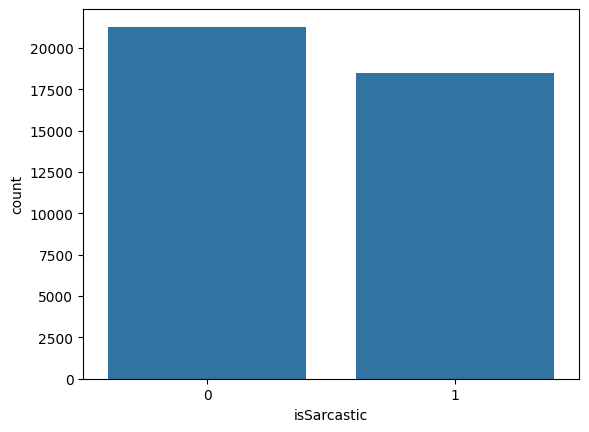

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels
sns.countplot(x='isSarcastic', data=dataset)
plt.show()

0    @0430yes i hope youre lurking rn. i want to li...
1    05 really taught me a valuable lesson I'm neve...
2    @098BERRY Never had a voice to protest, so you...
3    @0hMySt4rs Rest in peace & love to you and you...
4     100 days until Christmas! 🌲 #too soon  ready yet
Name: text, dtype: object


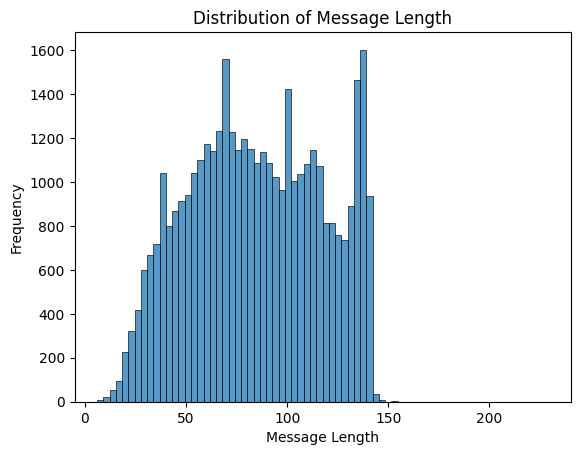

In [8]:
print(dataset['text'].head())

# Calculate the length of each message
dataset['message_length'] = dataset['text'].apply(len)

# Visualize the distribution of message lengths
sns.histplot(dataset['message_length'])
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Distribution of Message Length')
plt.show()

In [10]:
import text_mining_utils as tmu

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
sarcastic_docs = list(dataset.text[dataset.isSarcastic == 1])
sarcastic_category = ' '.join(sarcastic_docs)
nonsarcastic_docs = list(dataset.text[dataset.isSarcastic == 0])
nonsarcastic_category = ' '.join(nonsarcastic_docs)

In [13]:
tmu.print_n_mostFrequent('is_sarcastic', sarcastic_category, 10)
tmu.print_n_mostFrequent('notSarcastic', nonsarcastic_category, 10)

=== 10 most frequent tokens in is_sarcastic ===
	Frequency of "I" is: 0.031009896652890896
	Frequency of "." is: 0.030643887649645807
	Frequency of "to" is: 0.023732945997821237
	Frequency of "the" is: 0.02075299868006202
	Frequency of "a" is: 0.01882784896220597
	Frequency of "you" is: 0.01701797767056884
	Frequency of "," is: 0.014306052693768624
	Frequency of "and" is: 0.013571152726622977
	Frequency of "#" is: 0.012836252759477328
	Frequency of "my" is: 0.01123676459568974
=== 10 most frequent tokens in notSarcastic ===
	Frequency of "." is: 0.028142157091037043
	Frequency of "I" is: 0.027329742148811648
	Frequency of "to" is: 0.02197401307108372
	Frequency of "@" is: 0.02124956662578719
	Frequency of "the" is: 0.019772213339128906
	Frequency of "you" is: 0.01673988750381628
	Frequency of "a" is: 0.015974044118788517
	Frequency of "," is: 0.014726961309385203
	Frequency of "#" is: 0.013671339346238829
	Frequency of "and" is: 0.013252195331460121


In [14]:
#Both
texts = dataset["text"]
token = "my"

# calculate the percentage of the specified token in the texts
percentage = tmu.token_percentage(token, texts)

print(f"The token '{token}' appears in the texts with a frequency of {percentage:.2f}%")

The token 'my' appears in the texts with a frequency of 1.05%


In [15]:
#sarcastic
token = "nation"

# calculate the percentage of the specified token in the texts
percentage = tmu.token_percentage(token, sarcastic_docs)

print(f"The token '{token}' appears in the Sarcastic texts with a frequency of {percentage:.2f}%")

The token 'nation' appears in the Sarcastic texts with a frequency of 0.00%


In [16]:
##non sarcastic

token = "nation"

# Calculate the percentage of the specified token in the texts
percentage = tmu.token_percentage(token, nonsarcastic_docs)

print(f"The token '{token}' appears in the non Sarcastic texts with a frequency of {percentage:.2f}%")

The token 'nation' appears in the non Sarcastic texts with a frequency of 0.00%


In [14]:
%pip install nltk.corpus

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement nltk.corpus (from versions: none)
ERROR: No matching distribution found for nltk.corpus


In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words_removed_dataset = dataset.copy()

# Function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to each row in 'text' column
stop_words_removed_dataset['text'] = dataset['text'].apply(remove_stopwords)

stop_words_removed_dataset['isSarcastic'] = dataset['isSarcastic']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
sarcastic_docs_removed = list(stop_words_removed_dataset.text[stop_words_removed_dataset.isSarcastic == 1])
sarcastic_category_removed = ' '.join(sarcastic_docs_removed)
nonsarcastic_docs_removed = list(stop_words_removed_dataset.text[stop_words_removed_dataset.isSarcastic == 0])
nonsarcastic_category_removed = ' '.join(nonsarcastic_docs_removed)

In [21]:
tmu.print_n_mostFrequent('is_sarcastic', sarcastic_category_removed, 10)
tmu.print_n_mostFrequent('notSarcastic', nonsarcastic_category_removed, 10)

=== 10 most frequent tokens in is_sarcastic ===
	Frequency of "." is: 0.05147565470884429
	Frequency of "," is: 0.023918857060254897
	Frequency of "#" is: 0.021461440238995832
	Frequency of "@" is: 0.01541908593731178
	Frequency of "n't" is: 0.01456139928204881
	Frequency of "'s" is: 0.012407545715180572
	Frequency of ":" is: 0.011511311345074325
	Frequency of "!" is: 0.0111113788035753
	Frequency of "love" is: 0.009916399643433637
	Frequency of "like" is: 0.009506830173223794
=== 10 most frequent tokens in notSarcastic ===
	Frequency of "." is: 0.04510880786224553
	Frequency of "@" is: 0.033914192509394224
	Frequency of "," is: 0.023508279307924186
	Frequency of "#" is: 0.021819383078003057
	Frequency of "!" is: 0.018668703803113515
	Frequency of "n't" is: 0.01277614898624933
	Frequency of "'s" is: 0.012053516125036131
	Frequency of "?" is: 0.008543585084857745
	Frequency of "love" is: 0.007961349465251682
	Frequency of "'m" is: 0.007238716604038485


In [22]:
import text_mining_utils as tmu

In [23]:
#sarcastic
token = "."

# Calculate the percentage of the specified token in the texts
percentage = tmu.token_percentage(token, sarcastic_docs_removed)

print(f"The token '{token}' appears in the Sarcastic texts with a frequency of {percentage:.2f}%")

The token '.' appears in the Sarcastic texts with a frequency of 5.15%


In [71]:
##non sarcastic

token = "."

# cal the percentage of the token in the texts
percentage = tmu.token_percentage(token, nonsarcastic_docs_removed)

print(f"The token '{token}' appears in the non Sarcastic texts with a frequency of {percentage:.2f}%")

The token '.' appears in the non Sarcastic texts with a frequency of 0.43%


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 1000x600 with 0 Axes>

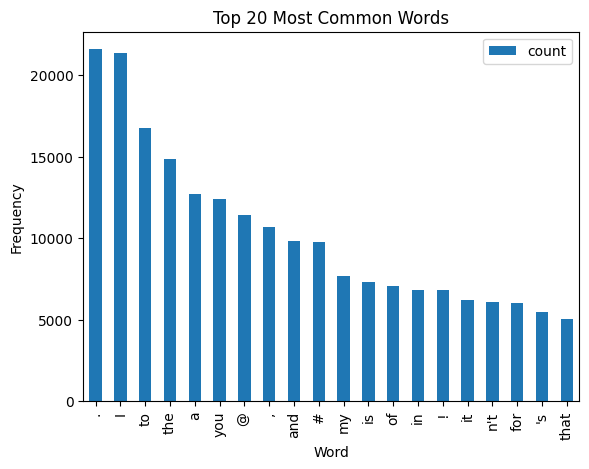

In [24]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK
nltk.download('punkt')

#tokenize the text data into individual words/tokens
dataset['tokens'] = dataset['text'].apply(word_tokenize)

word_counts = Counter(word for tokens in dataset['tokens'] for word in tokens)

import matplotlib.pyplot as plt
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])

word_counts_df = word_counts_df.sort_values(by='count', ascending=False)

# Plot the top 20 most common words
plt.figure(figsize=(10, 6))
word_counts_df.head(20).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.show()


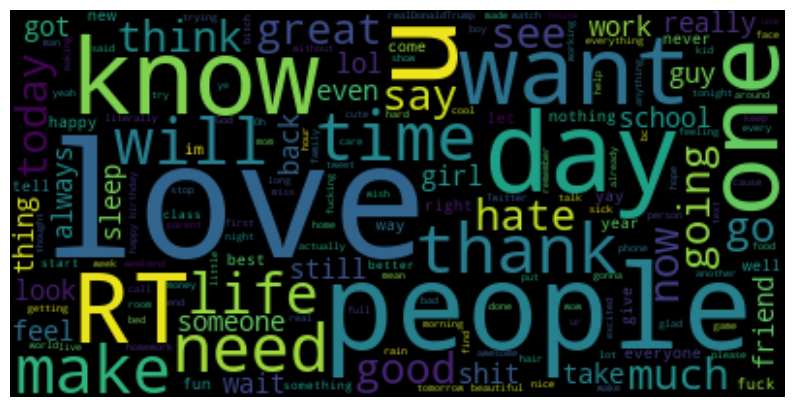

In [25]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(dataset['text'].astype(str))

# generate the word cloud
wordcloud = WordCloud(stopwords=None, background_color='black').generate(text_data)

# display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


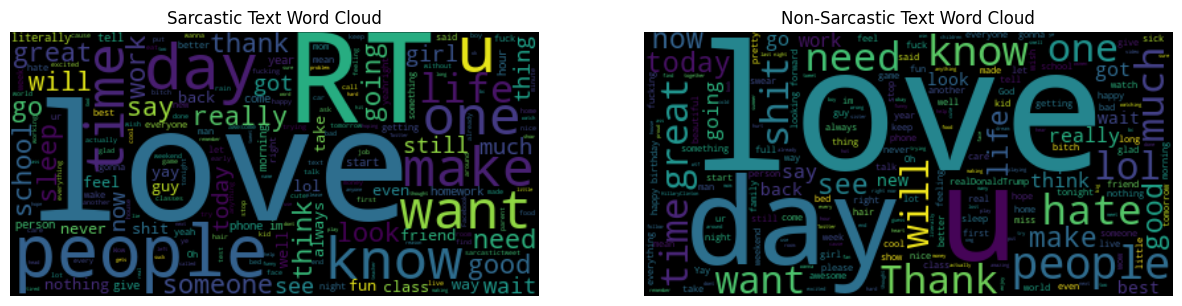

In [26]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sarcastic_df = dataset[dataset['isSarcastic'] == 1]
non_sarcastic_df = dataset[dataset['isSarcastic'] == 0]

#convert text data into strings for both classes
sarcastic_text = ' '.join(sarcastic_df['text'].astype(str))
non_sarcastic_text = ' '.join(non_sarcastic_df['text'].astype(str))

#generate word clouds for sarcastic and non-sarcastic texts
sarcastic_wordcloud = WordCloud(stopwords=None, background_color='black').generate(sarcastic_text)
non_sarcastic_wordcloud = WordCloud(stopwords=None, background_color='black').generate(non_sarcastic_text)

#display word clouds for sarcastic and non-sarcastic texts
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(sarcastic_wordcloud, interpolation='bilinear')
plt.title('Sarcastic Text Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_sarcastic_wordcloud, interpolation='bilinear')
plt.title('Non-Sarcastic Text Word Cloud')
plt.axis('off')

plt.show()
